## Observations and Insights 

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta
import matplotlib.patches as mpatches
import random
from collections import Counter


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read both data files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine both data into a single dataset
combined_mouse_study_results = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
combined_mouse_study_results_df = pd.DataFrame(combined_mouse_study_results)

# Display head and tail of the data table for preview
# combined_mouse_study_results.info()
combined_mouse_study_results_df.head(5).append(combined_mouse_study_results_df.tail(5))

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4

In [2]:
# Checking the number of mice on the combine dataframe
combined_mouse_study_results_df["Mouse ID"].count()

1893

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_data = combined_mouse_study_results_df.drop_duplicates("Mouse ID", keep='last') #remove duplicates from "Mouse ID column keeping the last data"
clean_mouse_study_results_data_df = pd.DataFrame(clean_mouse_study_results_data).reset_index(drop=True) # reset index back to 0 for clean dataframe
clean_mouse_study_results_data_df.head(3).append(clean_mouse_study_results_data_df.tail(5)) # preview 

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
244     z314     Stelasyn  Female          21          28          5   
245     z435     Propriva  Female          12          26         10   
246     z581    Infubinol  Female          24          25         45   
247     z795     Naftisol  Female          13          29         45   
248     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             22.050126                 1  
1             23.343598                 1  
2             28.484033                 0  
244           45.934712                 0  
245           48.710661                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_results_data_df['Mouse ID'].count()

249

## Summary Statistics

##### Summary Statistics 1 -   Multiple series (Tumor volume for each regimen)

In [6]:
#Get select data column for calculation
drug_and_tumor = clean_mouse_study_results_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_tumor = drug_and_tumor.set_index("Drug Regimen")
drug_and_tumor.head()

Tumor Volume (mm3)
Drug Regimen                    
Ramicane               22.050126
Capomulin              23.343598
Capomulin              28.484033
Capomulin              28.430964
Ramicane               29.128472

In [7]:
#Get mean and rename column from Tumor Volume (mm3) to mean 
mean = drug_and_tumor.groupby(level=0).mean()
mean = mean.rename(columns={"Tumor Volume (mm3)": "Mean"})
# mean

In [8]:
#Get median and rename column from Tumor Volume (mm3) to meadian
median = drug_and_tumor.groupby(level=0).median()
median = median.rename(columns={"Tumor Volume (mm3)": "Median"})
# median

In [9]:
#Get variance and rename column from Tumor Volume (mm3) to variance 
variance = drug_and_tumor.groupby(level=0).var()
variance = variance.rename(columns={"Tumor Volume (mm3)": "Variance"})
# variance

In [10]:
#Get std and rename column from Tumor Volume (mm3) to std 
std = drug_and_tumor.groupby(level=0).std()
std = std.rename(columns={"Tumor Volume (mm3)": "std"})
# std

In [11]:
#Get sem and rename column from Tumor Volume (mm3) to sem 
sem = drug_and_tumor.groupby(level=0).sem()
sem = sem.rename(columns={"Tumor Volume (mm3)": "sem"})
# sem

In [12]:
#Combine all above results in a df and display results
summary_statistics_01_df = pd.concat([ mean, median,variance,std,sem],join='outer', axis=1)
summary_statistics_01_df

Mean     Median    Variance        std       sem
Drug Regimen                                                       
Capomulin     36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927  10.297083  2.059417
Placebo       60.508414  62.030594   78.759797   8.874672  1.774934
Propriva      56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027   8.767099  1.753420

#### Summary Statistics 2 -   Single Groupby function (Tumor volume for each regimen)

In [13]:
summary_statistics_2_df = clean_mouse_study_results_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var", "std","sem"]).reset_index()

In [14]:
#Chenge index and display results
summary_statistics_2_df.set_index("Drug Regimen")

mean     median         var        std       sem
Drug Regimen                                                       
Capomulin     36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin      57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol     58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril      62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol      61.205757  63.283288  106.029927  10.297083  2.059417
Placebo       60.508414  62.030594   78.759797   8.874672  1.774934
Propriva      56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane      36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn      61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol     59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

In [15]:
# Display total number of mice for each treatment throughout the course of the study using pandas.

mince_number_and_drug = summary_statistics_2_df[["Drug Regimen","mean"]] # isolate columns for plot and change index accordingly
mince_number_and_drug = mince_number_and_drug.set_index("Drug Regimen") 
# mince_number_and_drug.head() # preview data

#create the bar plot using pandas plot function and adjust format
mince_number_and_drug.plot(kind="bar",legend=False,width=0.9,figsize=(10,6),color='cadetblue',rot=60)

# plt.title("n/a")
plt.xlabel("Regimens Options")
plt.ylabel("Tumor Volume (mm3) per Mince")

plt.xlim(-0.75, len(summary_statistics_2_df),100)
plt.ylim(0,80)

plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

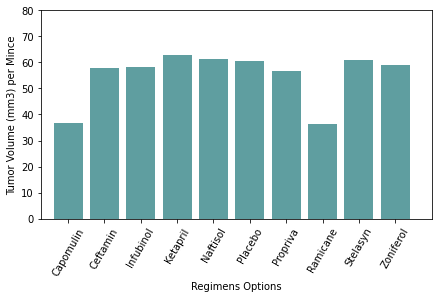

In [16]:
# Display total number of mice for each treatment throughout the course of the study using pyplot.

#Get x-axis and tick location )
x_axis = np.arange(len(summary_statistics_2_df))
tick_locations = [value for value in x_axis]

#create the bar plot using pyplot function and adjust  format to much with the pandas
plt.bar(x_axis, summary_statistics_2_df["mean"], color='cadetblue', alpha=1, align="center",)
plt.xticks(tick_locations, summary_statistics_2_df["Drug Regimen"], rotation=60)
plt.tight_layout()

plt.xlim(-0.75, len(x_axis),100)
plt.ylim(0, 80)
plt.rc('figure', figsize=(10,6))


# plt.title("n/a")
plt.xlabel("Regimens Options")
plt.ylabel("Tumor Volume (mm3) per Mince")

plt.show()

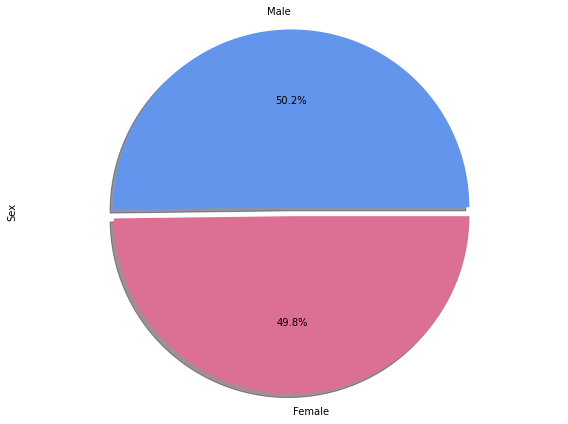

In [33]:
# Display a pie plot showing the distribution of female versus male mice using pandas

#create the pie plot using pandas plot function and adjust standard format
clean_mouse_study_results_data_df["Sex"].value_counts().plot(kind='pie', autopct='%1.1f%%',shadow=True, explode=(0,0.05),
     startangle=0,  fontsize=10, legend=False,figsize=(8,6),
     colors = ['cornflowerblue', 'palevioletred'] )


plt.title("")
# blue_patch = mpatches.Patch(color="cornflowerblue", label="Female")
# # red_patch = mpatches.Patch(color="palevioletred", label="Male")
# plt.legend(handles=[red_patch,blue_patch],loc="best")


plt.axis("equal")
plt.tight_layout()
plt.show()



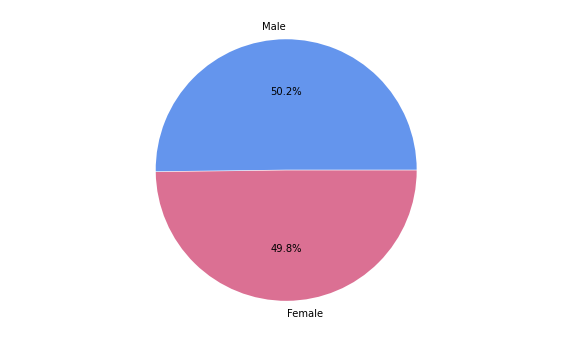

<Figure size 576x432 with 0 Axes>

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("")
labels = ["Male", "Female"]
male_and_female = clean_mouse_study_results_data_df[["Mouse ID","Sex"]]
male_and_female = male_and_female.set_index("Mouse ID")

males_fameles_count = male_and_female.value_counts()

colors = ['cornflowerblue', 'palevioletred']

explode = (0, 0.005)
plt.axis("equal")

#create the pie plot using pyplot function and adjust  format to much with the pandas
plt.pie(males_fameles_count,explode = explode, labels = labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=0)
plt.figure(figsize=(8, 6))


plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: # Capomulin, Ramicane, Infubinol, and Ceftamin

# Sort values for calculation
sorting_values = clean_mouse_study_results_data_df.sort_values(['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']).groupby('Mouse ID').head(4).set_index('Drug Regimen')
# sorting_values

#get the last (greatest) timepoint for each mouse for all treatment regimens and preview
timepoint_volume = sorting_values.nlargest(4, 'Timepoint',keep='all')
timepoint_volume_df = pd.DataFrame(timepoint_volume)
tumor_volume = timepoint_volume_df['Tumor Volume (mm3)']
tumor_volume_df= pd.DataFrame(tumor_volume)
tumor_volume_df  

#Get data for the four of the treatment regimens required and preview
selected_treatment_regimens = tumor_volume_df .loc[['Capomulin', 'Ramicane','Infubinol','Ceftamin'],:]
selected_treatment_regimens

Tumor Volume (mm3)
Drug Regimen                    
Capomulin              38.982878
Capomulin              38.939633
Capomulin              37.074024
Capomulin              40.159220
Capomulin              47.685963
...                          ...
Ceftamin               67.527482
Ceftamin               64.634949
Ceftamin               61.386660
Ceftamin               68.594745
Ceftamin               64.729837

[63 rows x 1 columns]

In [20]:
#Get IQR and print result
Q1 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.25)
Q3 = selected_treatment_regimens['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

28.66218635


In [21]:
# quartiles = selected_treatment_regimens['Tumor Volume (mm3)'].quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile is: {lowerq}")
# print(f"The upper quartile is: {upperq}")
# print(f"The interquartile range is: {iqr}")
# print(f"The the median  is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

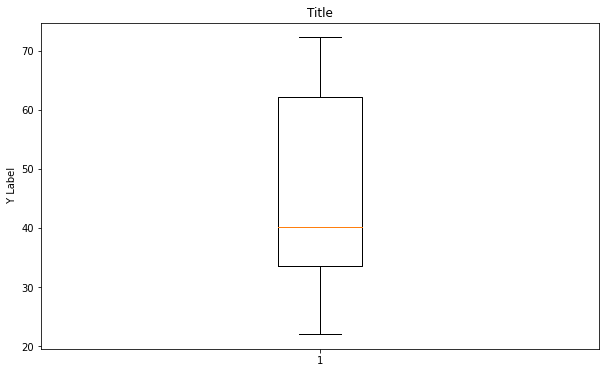

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Title')
ax1.set_ylabel(' Y Label')
ax1.boxplot(selected_treatment_regimens['Tumor Volume (mm3)'])
plt.show()


## Line and Scatter Plots

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_vs_tumor_volume = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Timepoint']]
# Capomulin_tumor_volume.head()

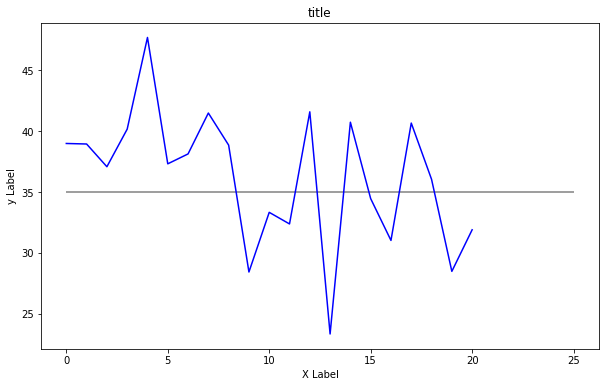

In [45]:
plt.title ("title")
plt.xlabel("X Label")
plt.ylabel("y Label")
plt.hlines (35,0,25, color="black", alpha=0.5)
plt.rc('figure', figsize=(10,6))

x_axis = np.arange(len(Capomulin_vs_tumor_volume['Timepoint']))
# x_axis

y_axis = Capomulin_vs_tumor_volume['Tumor Volume (mm3)']
# y_axis
plt.plot(x_axis,y_axis, color = "blue")



In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mouse_weight = timepoint_volume.loc[['Capomulin'],['Tumor Volume (mm3)','Weight (g)']]
# Capomulin_mouse_weight.head()

In [30]:
mean_tumor_vol_cap = Capomulin_mouse_weight.groupby('Tumor Volume (mm3)').mean()
mean_tumor_vol_cap = mean_tumor_vol_cap.reset_index()
# mean_tumor_vol_cap.head()

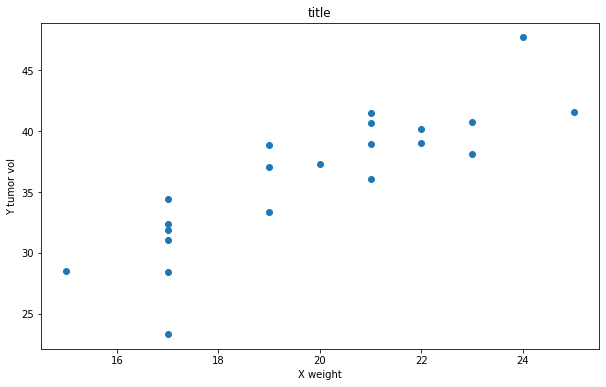

In [31]:
plt.title ("title")
plt.xlabel("X Label")
plt.ylabel("y Label")

plt.scatter(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])
plt.xlabel('X weight')
plt.ylabel('Y tumor vol')
plt.show()

## Correlation and Regression

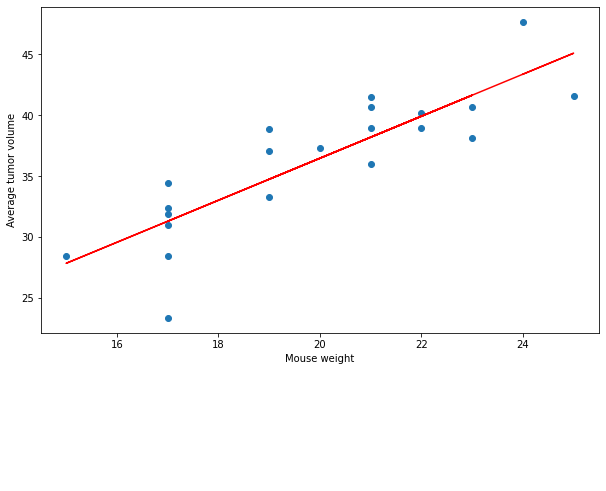

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.85


In [51]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = mean_tumor_vol_cap['Weight (g)']
y_values = mean_tumor_vol_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Mouse weight')
plt.ylabel("Average tumor volume" )
plt.show()

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(mean_tumor_vol_cap['Weight (g)'], mean_tumor_vol_cap['Tumor Volume (mm3)'])[0],2)}")